In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
import time

In [2]:
mkfunc2 = lambda x, pos: "2/"+time.ctime(x+9*3600)[8:16]
mkformatter2 = matplotlib.ticker.FuncFormatter(mkfunc2)

In [3]:
with open("gke.log.20220223","r") as fd: lines1=fd.readlines()
with open("gke.log.20220224","r") as fd: lines2=fd.readlines()
with open("gke.log.20220225","r") as fd: lines3=fd.readlines()
with open("gke.log.20220226","r") as fd: lines4=fd.readlines()

lines=lines1+lines2+lines3

In [4]:
gke_times=[]
gke_nodes=[]
gke_gpus=[]
gke_running=[]
gke_pending=[]
for line in lines:
    larr=line.strip().split()
    if len(larr)!=16: continue
    t=int(larr[5][1:-1]) #(utime)
    if t<1645625632: continue
    if t>1645831000: continue
    gke_times.append(t)
    gke_nodes.append(int(larr[7]))
    gke_gpus.append(int(larr[9]))
    gke_running.append(int(larr[13]))
    gke_pending.append(int(larr[15]))

                     

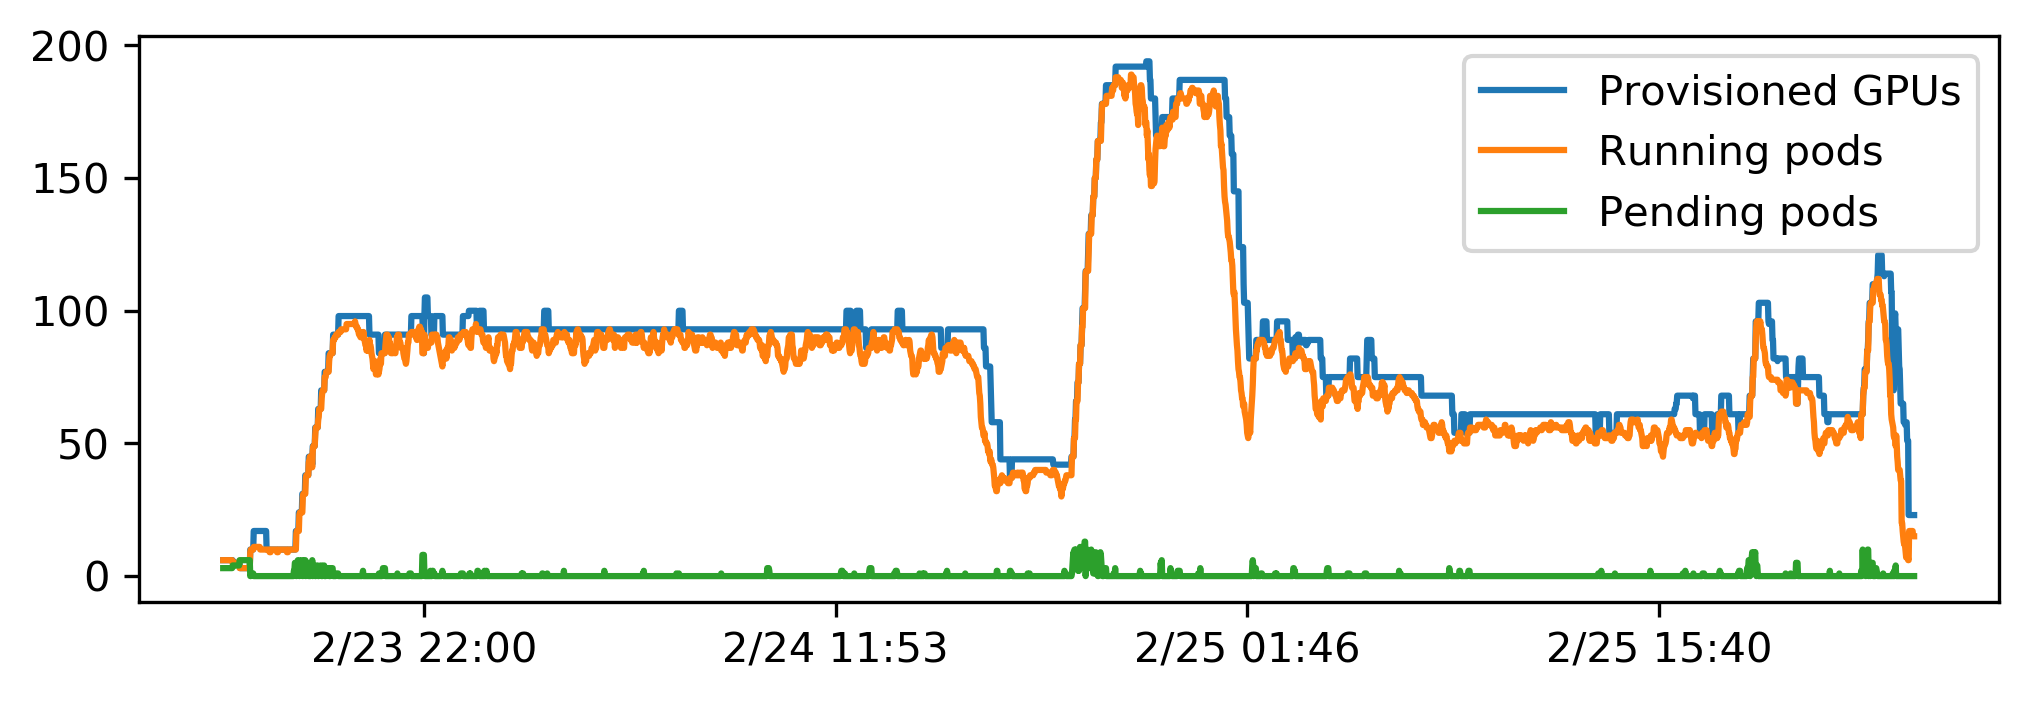

In [5]:
from matplotlib.pyplot import figure

figure(figsize=(8, 2.5), dpi=300)

ax=plt.gca()
ax.xaxis.set_major_formatter(mkformatter2)

plt.plot(gke_times,gke_gpus, label="Provisioned GPUs")
plt.plot(gke_times,gke_running, label="Running pods")
plt.plot(gke_times,gke_pending, label="Pending pods")
plt.legend()
plt.savefig("gke_autoscale.svg",format="svg")
plt.savefig("gke_autoscale.png",format="png")
plt.savefig("gke_autoscale.pdf",format="pdf")
plt.show()
